# Problem set 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Processing

## Read data files

In [2]:
# # Let's read the spam_train file
# df_train_data = pd.read_csv("spam_data/spam_train.txt", header=None)
# df_train_data.columns = ['email']
# label = [context[0] for context in df_train_data['email']]
# df_train_data['label'] = label
# df_train_data['email'] = [context[1:] for context in df_train_data['email']]
# df_train_data.head()

,email,label
0,public announc the new domain name ar final a...,1
1,have tax problem do you ow the ir monei if yo...,1
2,r robert harlei write r scuse me for post in ...,0
3,on wed number oct number brian fahrland wrote...,0
4,quot ronan waid sure but soft link would do t...,0


In [3]:
# # Let's read the spam_train file
# df_test_data = pd.read_csv("spam_data/spam_test.txt", header=None)
# df_test_data.columns = ['email']
# label = [context[0] for context in df_test_data['email']]
# df_test_data['label'] = label
# df_test_data['email'] = [context[1:] for context in df_test_data['email']]
# df_test_data.head()

,email,label
0,thi e mail ad is be sent in full complianc wi...,1
1,i ve got a test set here that s the last numb...,0
2,bonjour i m writ a python script in order to ...,0
3,hello unlimit intern telephon call market if ...,1
4,it seem that an email consist of a singl line...,0


## Split training data

In [4]:
# #split train data into validation and train sets
# validation = df_train_data[:1000]
# validation.shape

(1000, 2)

In [5]:
# train = df_train_data[1000:]
# train.shape

(4000, 2)

## Split training data into train.txt and validation.txt

In [7]:
f = open('spam_data/spam_train.txt')
f_train = open('spam_data/train.txt', 'a')
f_validation= open('spam_data/validation.txt', 'a')
i = 1
for line in f.readlines():
    if i<=1000:
        f_validation.write(line)
        i+=1
    else:
        f_train.write(line)
        i+=1

f_validation.close()
f_train.close()
f.close()

In [77]:
#double-check the size of train.txt
train_data = pd.read_csv("spam_data/train.txt", header=None)
train_data.shape

(4000, 1)

## Transform into feature vectors

In [78]:
def words(data,X):
    f=open(data,'r')
    word_dic = {}
    word_list = []
    for line in f.readlines():
        #remove the label
        line_lst = line.split()[1:] 
        line_lst = list(dict.fromkeys(line_lst))
        for word in line_lst:
            if word in word_dic.keys():
                word_dic[word]+=1
            else:
                word_dic[word]=1
                
    for word in word_dic:
        if word_dic[word]>=X:
            word_list.append(word)
    return word_list

Create word list with X = 26 using whole training data set(4000 data)

In [79]:
word_list = words("spam_data/train.txt",26)
print('The word list contains %s words.'% (len(word_list)))

The word list contains 2677 words.


In [80]:
def feature_vector(email):
    feature_list = []
    for word in word_list:
        if word in email:
            feature_list.append(1)
        else:
            feature_list.append(0)            
    return feature_list

# Preceptron Algorithms

In [88]:
def preceptron_train(data):
    f=open(data,'r')
    email_list = [line for line in f]
    m = len(word_list)
    #set initial value of w to be zero vector
    w = np.asarray([0]*m)
    cont = True
    #k is number of updates
    k = 0
    iteration = 0
    while cont:
        corr = 0
        for email in email_list:
            iteration += 1
            feature_list = np.asarray(feature_vector(email))
            label = email[0]
            #change label from 0 to -1 to implement the algorithm
            if label == '0':
                label = -1
            if int(label)*(np.dot(feature_list,w))>0:
                corr+=1
            else:
                w = w + int(label)*feature_list
                k += 1
#                 print("update")
#         print("A round over")

        #stopping criteria
        if corr == len(email_list):
            cont = False

    return (w,k,iteration/len(email_list))

In [ ]:
def preceptron_error(w,data):
    f=open(data,'r')
    email_list = [line for line in f]
    #count the time of uncorrect classification
    misclassified = 0
    for email in email_list:      
        feature_list = np.asarray(feature_vector(email))
        label = email[0]
        #change label from 0 to -1 to implement the algorithm
        if label == '0':
            label = -1
        if int(label)*(np.dot(feature_list,w))<=0:
            misclassified+=1
    error_rate = misclassified/len(email_list)
    return error_rate

# Train classifier

In [14]:
# f = open('spam_data/spam_train.txt')
# f_small_train = open('spam_data/small_train.txt', 'a')
# i = 1
# for line in f.readlines():
#     if i<=5:
#         f_small_train.write(line)
#         i+=1
#     else:
#         break

# f_small_train.close()
# f.close()

In [90]:
 (w,k,iteration) = preceptron_train("spam_data/train.txt")

In [92]:
w

array([ 19, -10, -23, ...,   0,   2,   0])

In [96]:
print('After trained with trian.txt, the final classification vector is',w)
print('Total number of updates(mistakes):',k)
print('Total number of passes through the data:',iteration)

After trained with trian.txt, the final classification vector is [ 19 -10 -23 ...   0   2   0]
Total number of updates(mistakes): 680
Total number of passes through the data: 22.0


In [94]:
error_rate = preceptron_error(w,"spam_data/train.txt")
print("The error rate of trining data is",error_rate)

The error rate of trining data is 0.0


In [95]:
len(w)

2677

## Classisify in validation set

In [97]:
 (w_valid,k_valid,iteration_valid) = preceptron_train("spam_data/validation.txt")

In [100]:
print('After trained with trian.txt, the final classification vector is',w_valid)
print('Total number of updates(mistakes):',k_valid)
print('Total number of passes through the data:',iteration_valid)

After trained with trian.txt, the final classification vector is [15  1 -5 ...  0  4  1]
Total number of updates(mistakes): 221
Total number of passes through the data: 9.0


In [101]:
error_rate_valid = preceptron_error(w,"spam_data/validation.txt")
print("The error rate of validation data is",error_rate_valid)

The error rate of validation data is 0.028


# Understand more about classifier

In [102]:
w_array = np.asarray(w)
idx_top_12 = (-w_array).argsort()[:12]
weight_top_12 = [w[idx] for idx in list(idx_top_12)]
top_12_word = [word_list[idx] for idx in list(idx_top_12)]
print('Words with the most positive weights:\n',top_12_word)
print('Coresponding weights are:\n',weight_top_12)

Words with the most positive weights:
 ['remov', 'click', 'free', 'market', 'guarante', 'sight', 'nb', 'we', 'name', 'car', 'deathtospamdeathtospamdeathtospam', 'pleas']
Coresponding weights are:
 [47, 45, 36, 28, 27, 27, 26, 25, 24, 24, 23, 23]


In [103]:
w_array = np.asarray(w)
idx_least_12 = (w_array).argsort()[:12]
weight_least_12 = [w[idx] for idx in list(idx_least_12)]
least_12_word = [word_list[idx] for idx in list(idx_least_12)]
print('Words with the most negative weights:\n',least_12_word)
print('Coresponding weights are:\n',weight_least_12)

Words with the most negative weights:
 ['wrote', 'author', 'view', 'which', 'the', 'httpaddr', 'not', 'http', 'version', 'but', 'prefer', 'date']
Coresponding weights are:
 [-41, -27, -27, -23, -23, -23, -22, -22, -21, -21, -21, -21]


# Using first N row of data

In [108]:
def split_train_data(new_file_name, N):
    f_train = open('spam_data/train.txt', 'r')
    f_N= open(new_file_name, 'a')
    i = 1
    for line in f_train.readlines():
        if i<=N:
            f_N.write(line)
            i+=1
    f_N.close()
    f_train.close()

 ### Create data file with different N 

In [109]:
N = [200,600,1200,2400,4000]
for number in N:
    new_file_name ='spam_data/train_%s.txt'% (number)
    split_train_data(new_file_name, number)

In [115]:
N = [200,600,1200,2400,4000]
validation_error_list = []
num_updates_list = []
iteration_list = []
for number in N:
    file_name ='spam_data/train_%s.txt'% (number)
    word_list = words(file_name,26)
    (w,k,iteration) = preceptron_train(file_name)
    error_rate_valid =preceptron_error(w,"spam_data/validation.txt")
    
    iteration_list.append(iteration)
    validation_error_list.append(error_rate_valid)
    num_updates_list.append(k)
    print('N = %d, validation_error = %s, number of iteration = %d, number of updates = %d'%(number, error_rate_valid,iteration, k ))

100
N = 200, validation_error = 0.1, number of iteration = 15, number of updates = 198
59
N = 600, validation_error = 0.059, number of iteration = 8, number of updates = 192
38
N = 1200, validation_error = 0.038, number of iteration = 10, number of updates = 286
27
N = 2400, validation_error = 0.027, number of iteration = 10, number of updates = 415
28
N = 4000, validation_error = 0.028, number of iteration = 22, number of updates = 680


### Plot

No handles with labels found to put in legend.


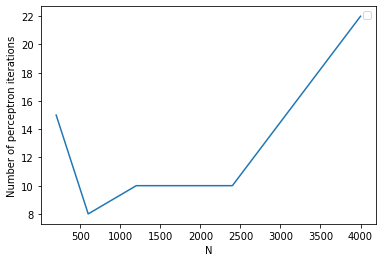

In [116]:
plt.plot(N, iteration_list)
plt.xlabel("N")
plt.ylabel("Number of perceptron iterations")

No handles with labels found to put in legend.


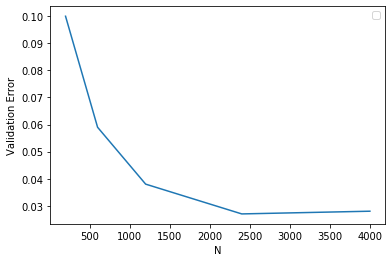

In [119]:
plt.plot(N, validation_error_list)
plt.xlabel("N")
plt.ylabel("Validation Error")

# Update Perceptron algorithm

In [118]:
def preceptron_train_max(data,max_iter):
    f=open(data,'r')
    email_list = [line for line in f]
    m = len(word_list)
    #set initial value of w to be zero vector
    w = np.asarray([0]*m)
    cont = True
    #k is number of updates
    k = 0
    iteration = 0
    while cont:
        corr = 0
        for email in email_list:
            iteration += 1
            feature_list = np.asarray(feature_vector(email))       
            label = email[0]         
            #change label from 0 to -1 to implement the algorithm
            if label == '0':
                label = -1
            if int(label)*(np.dot(feature_list,w))>0:
                corr+=1
            else:
                w = w + int(label)*feature_list
                k += 1
        #update
        if iteration/len(email_list)==max_iter:
            cont = False
        elif corr == len(email_list):
            cont = False

    return (w,k,iteration/len(email_list))

# Try different configurations! <font size="2">Using all 4000 training data</font>

## Fix X = 26, try max_iteration = 10, 11, 12, 13, 14 and plot figures

In [134]:
max_iteration_list = [10,11,12,13,14]
word_list = words("spam_data/train.txt",26)
print('The word list contains %s words.'% (len(word_list)))
validation_error_list = []
num_updates_list = []
iteration_list = []
for number in max_iteration_list:
    (w,k,iteration) = preceptron_train_max("spam_data/train.txt",number)
    error_rate_valid =preceptron_error(w,"spam_data/validation.txt")
    iteration_list.append(iteration)
    validation_error_list.append(error_rate_valid)
    num_updates_list.append(k)
    print('Max_iteration = %d, validation_error = %s, number of iteration = %d, number of updates = %d'%(number, error_rate_valid,iteration, k ))

The word list contains 2677 words.
28
Max_iteration = 10, validation_error = 0.028, number of iteration = 10, number of updates = 615
28
Max_iteration = 11, validation_error = 0.028, number of iteration = 11, number of updates = 623
28
Max_iteration = 12, validation_error = 0.028, number of iteration = 12, number of updates = 636
30
Max_iteration = 13, validation_error = 0.03, number of iteration = 13, number of updates = 643
29
Max_iteration = 14, validation_error = 0.029, number of iteration = 14, number of updates = 647


Text(0, 0.5, 'Number of perceptron iterations')

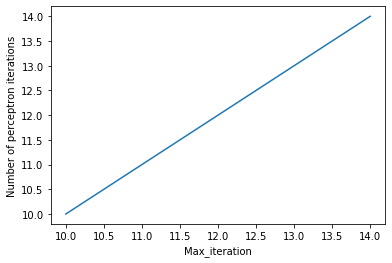

In [135]:
plt.plot(max_iteration_list, iteration_list)
plt.xlabel("Max_iteration")
plt.ylabel("Number of perceptron iterations")

Text(0, 0.5, 'Validation Error')

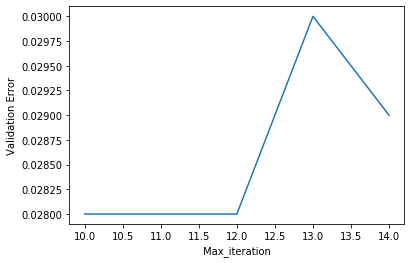

In [136]:
plt.plot(max_iteration_list, validation_error_list)
plt.xlabel("Max_iteration")
plt.ylabel("Validation Error")

## Fix max_iteration = 10, try X = 22, 24, 26, 28, 30 and plot figures

In [138]:
X = [22,24,26,28,30]
max_iter = 10
validation_error_list = []
num_updates_list = []
iteration_list = []
for number in X:
    word_list = words("spam_data/train.txt",number)
    (w,k,iteration) = preceptron_train_max("spam_data/train.txt",max_iter)
    error_rate_valid =preceptron_error(w,"spam_data/validation.txt")
    iteration_list.append(iteration)
    validation_error_list.append(error_rate_valid)
    num_updates_list.append(k)
    print('X = %d, validation_error = %s, number of iteration = %d, number of updates = %d'%(number, error_rate_valid,iteration, k ))

23
X = 22, validation_error = 0.023, number of iteration = 10, number of updates = 617
23
X = 24, validation_error = 0.023, number of iteration = 10, number of updates = 632
28
X = 26, validation_error = 0.028, number of iteration = 10, number of updates = 615
21
X = 28, validation_error = 0.021, number of iteration = 10, number of updates = 638
41
X = 30, validation_error = 0.041, number of iteration = 10, number of updates = 630


Text(0, 0.5, 'Number of perceptron iterations')

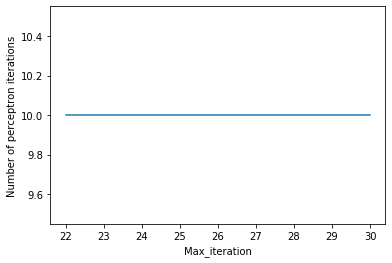

In [141]:
plt.plot(X, iteration_list)
plt.xlabel("Max_iteration")
plt.ylabel("Number of perceptron iterations")

In [148]:
validation_error_list

[0.023, 0.023, 0.028, 0.021, 0.041]

In [150]:
X = [22,24,26,28,30]

Text(0, 0.5, 'Validation Error')

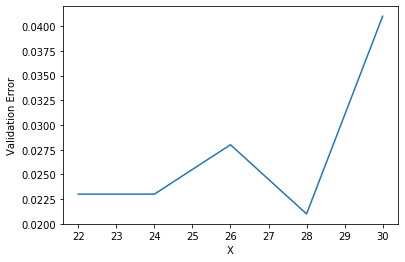

In [152]:
plt.plot(X, validation_error_list)
plt.xlabel("X")
plt.ylabel("Validation Error")

# Train on full set!! <font size="2">Using all of spam_train.txt using max_iter = 10 and X = 28. Use spam_test to see error rate. </font>

In [158]:
X = 28
word_list = words("spam_data/spam_train.txt",X)
print('The word list contains %s words.'% (len(word_list)))

The word list contains 2906 words.


In [159]:
max_iter = 10
(w,k,iteration) = preceptron_train_max("spam_data/spam_train.txt",max_iter)
error_rate_valid =preceptron_error(w,"spam_data/spam_test.txt")
print('X = %d, validation_error = %s, number of iteration = %d, number of updates = %d'%(X, error_rate_valid,iteration, k ))

24
X = 28, validation_error = 0.024, number of iteration = 10, number of updates = 734


# Question1-9 <font size="2">suppose only consider words with X = 1500, how many features are there? Is the data liely separate?</font>

In [145]:
X = 1500
word_list = words("spam_data/spam_train.txt",X)
print('The word list contains %s features(words).'% (len(word_list)))

The word list contains 51 features(words).


The data is not linely separate since when trying to run the perception, it will not converge and the mistake in each iteration will not decrease. 

# Question1-10 <font size="2">Why we need a training set, validation set, and test set?</font>

**Answer:** 

- Training set is to train the classifier and help the classifier learn the parameters(i.e. weights w). 

- With the validation set, we can adjust the parameters of the model(i.e. max_iteration, X) to find the one yields the best performance. It can help aviod problems like overfitting. 

- Test set is a set of "new" data for the finalized model. Using test set, we can know the true unbiased performance of the classifier.

# Problem 2: <font size="2">Prove the parameter vector $ w = (w_1,w_2, ..., w_n) $ is perpendicular to the hyperplane $ \{x | w x + b = 0 \} $</font>

$\textbf{proof}$: 
Denote the hyperplane $ \{x | w x + b = 0 \} $ as $\mathcal H $. Take $\forall$ $x_1,x_2 \in \mathcal H$, such that $ w x_a + b = 0 $ and  $w x_2 + b = 0 $. Then by substracting two equations, get 
$$ w(x_1-x_2) = 0. $$
Since by assumption $x_1,x_2 \in \mathcal H$, by property of a plane, we know $ x_1-x_2 \in \mathcal H $. The dot product between parameter vector $w$ and the vector  $ x_1-x_2 $ is 0, directly gives that $w$ is perpendicular to  $ x_1-x_2 $.

 w.l.o.g. we can find $ \forall  x_3,x_4 \in \mathcal H $ such that $ x_3-x_4 \in \mathcal H $, $ x_3-x_4 \neq x_1-x_2 $, and  $w$ is perpendicular to  $ x_3-x_4 $.
 
 Therefore, we can conclude that  $w$ is perpendicular to $\mathcal H$. 


# Problem 3: <font size="2">Prove theperception algorithm converge within $ \frac{R^2}{\gamma^2}$ mistakes if the data sample are separable.</font>

Proof of Claim 2: $w_{t+1}w^\ast = w_{t}w^\ast + y_t x_t w^\ast \leq w_t w + \gamma \leq w_{t-1}w^\ast + 2\gamma \leq ...\leq M_t \gamma$. Therefore we get $w_t w^\ast \leq M_t \gamma$ by induction.

Proof of Claim 3: From Claim 1 and 2, we have the following inequality:$M_t^2 \gamma^2 \leq \left\lVert w_t\right\rVert \left\lVert w_\ast\right\rVert \leq M_t R^2$, which directly gives: $M_t\leq \frac{R^2}{\gamma^2}$.

# Problem 4: <font size="2">Guess the number(or range) of $R$ and $\gamma$.</font>

Since by definiation, $R = \max{|x^i|}$, which can be get through the code. So the first step is to find this number. The parameter used is X = 28, max_iter = 10. 

In [160]:
X = 28
word_list = words("spam_data/spam_train.txt",X)
print('The word list contains %s words.'% (len(word_list)))

The word list contains 2906 words.


Need to change the function of the algorithm to get R

In [167]:
def preceptron_train_max(data,max_iter):
    f=open(data,'r')
    email_list = [line for line in f]
    m = len(word_list)
    #set initial value of w to be zero vector
    w = np.asarray([0]*m)
    cont = True
    #k is number of updates
    k = 0
    iteration = 0
    R = 0
    while cont:
        corr = 0
        for email in email_list:
            iteration += 1
            feature_list = np.asarray(feature_vector(email))       
            label = email[0]  
            norm = np.linalg.norm(feature_list)#, ord=2, axis=None, keepdims=False)
            if norm >R:
                R = norm
            #change label from 0 to -1 to implement the algorithm
            if label == '0':
                label = -1
            if int(label)*(np.dot(feature_list,w))>0:
                corr+=1
            else:
                w = w + int(label)*feature_list
                k += 1
        #update
        if iteration/len(email_list)==max_iter:
            cont = False
        elif corr == len(email_list):
            cont = False

    return (w,k,iteration/len(email_list),R)

In [168]:
max_iter = 10
(w,k,iteration,R) = preceptron_train_max("spam_data/spam_train.txt",max_iter)
error_rate_valid =preceptron_error(w,"spam_data/spam_test.txt")
print('X = %d, validation_error = %s, number of iteration = %d, number of updates = %d, R = %d'%(X, error_rate_valid,iteration, k,R ))

24
X = 28, validation_error = 0.024, number of iteration = 10, number of updates = 734, R = 38


Since by definiation, $R = \max{|x^i|}$, which can be get through the code, R = 38. number of updates : $M_t = 734$. From Question 3, we know: $\gamma^2 \leq R^2/M_t$, which indicates that $\gamma < 1.40$.